In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the data
df = pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
# Drop day, moth year
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
## Encoding
df['Classes'] = np.where(df['Classes'].str.contains("not fire"), 0,1)

In [9]:
print(df.head())
print(df['Classes'].value_counts())

   Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  Classes  Region
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5        0       0
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4        0       0
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1        0       0
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0        0       0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5        0       0
Classes
1    137
0    106
Name: count, dtype: int64


In [10]:
## Indeprendent and dependent feautures
X = df.drop('FWI', axis=1)
y = df['FWI']
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [11]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [12]:
## Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [13]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [14]:
## Features Selection based on correlation
X_train.corr

<bound method DataFrame.corr of      Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  Classes  Region
97            29  74  19   0.1  75.8   3.6  32.2   2.1   5.6        0       0
141           31  72  14   0.2  60.2   3.8   8.0   0.8   3.7        0       1
192           40  31  15   0.0  94.2  22.5  46.3  16.6  22.4        1       1
68            32  60  18   0.3  77.1  11.3  47.0   2.2  14.1        0       0
119           32  47  14   0.7  77.5   7.1   8.8   1.8   6.8        0       0
..           ...  ..  ..   ...   ...   ...   ...   ...   ...      ...     ...
106           24  82  15   0.4  44.9   0.9   7.3   0.2   1.4        0       0
14            28  80  17   3.1  49.4   3.0   7.4   0.4   3.0        0       0
92            25  76  17   7.2  46.0   1.3   7.5   0.2   1.8        0       0
179           34  59  16   0.0  88.1  19.5  47.2   7.4  19.5        1       1
102           30  77  21   1.8  58.5   1.9   8.4   1.1   2.4        0       0

[182 rows x 11 columns]>

<Axes: >

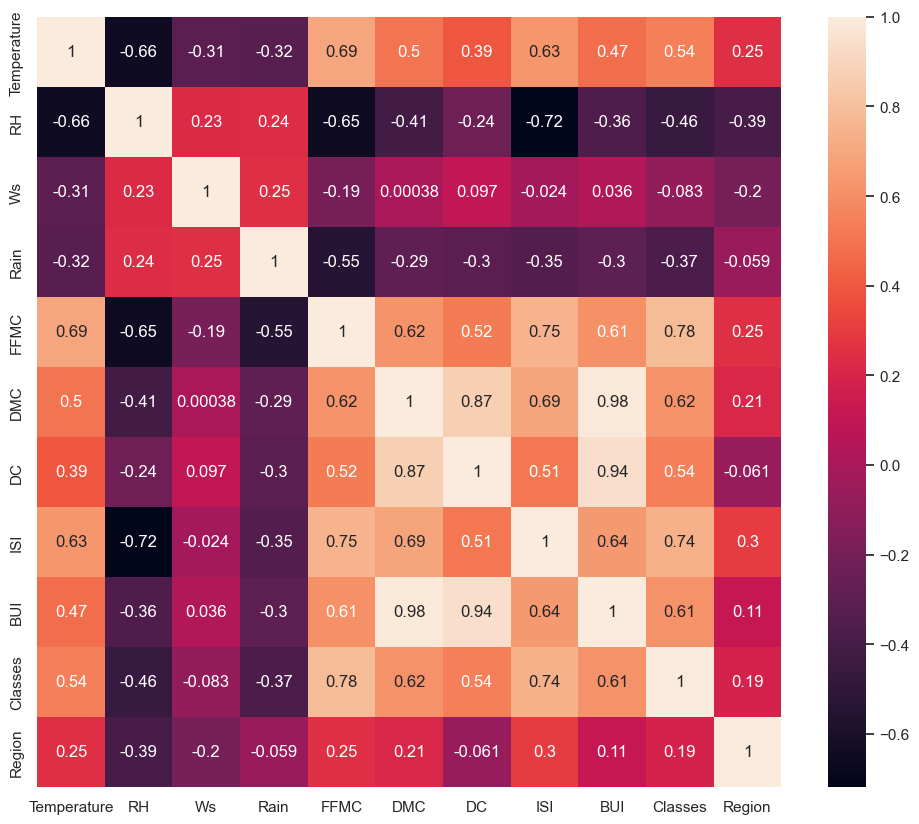

In [15]:
## Check for multicollinearity
# More size of the figure
sns.set(rc={'figure.figsize':(12,10)})
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [16]:
def correlation_funtion(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [17]:
corr_feature = correlation_funtion(X_train, 0.85)

In [18]:
## Drop highly correlated features
X_train.drop(corr_feature, axis=1, inplace=True)
X_test.drop(corr_feature, axis=1, inplace=True)

# See the shape after dropping correlated features
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [19]:
## Feature Scaling or Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)


In [20]:
X_train_scaler

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

### Box Plots to understand effect of Standard Scaler

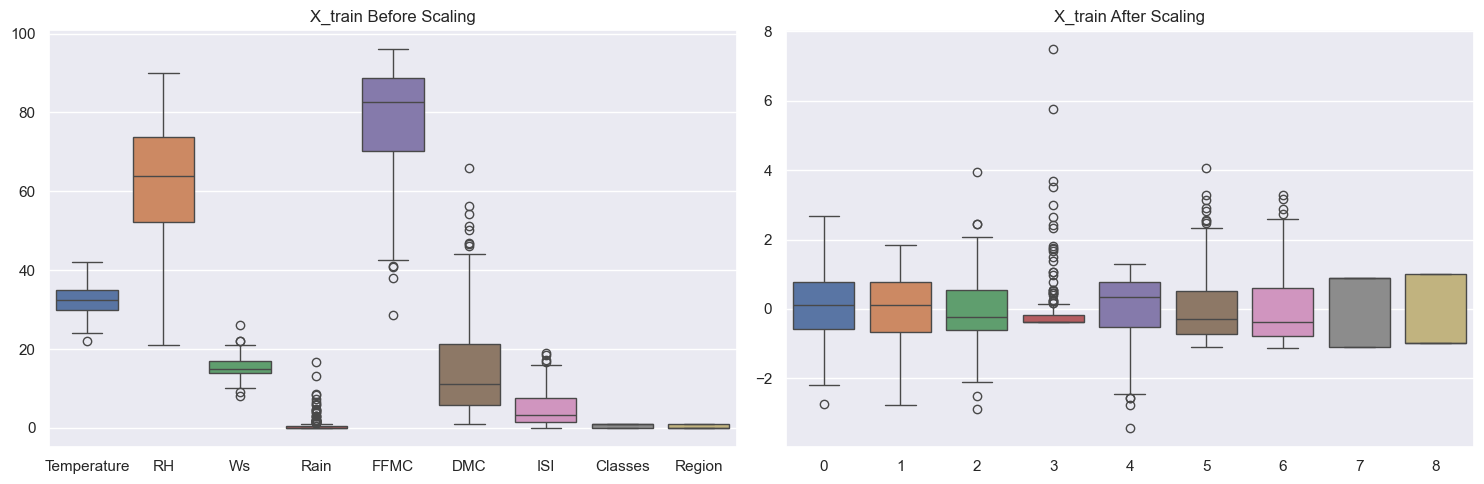

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=X_train, ax=axes[0])
axes[0].set_title("X_train Before Scaling")
sns.boxplot(data=X_train_scaler, ax=axes[1])
axes[1].set_title("X_train After Scaling")
plt.tight_layout()
plt.show()

# Predictive models
## Linear Regression Model

Linear regression analysis is used to predict the value of one variable based on the value of another. The variable you want to predict is called the dependent variable. The variable you are using to predict the value of the other variable is called the independent variable.

Error absoluto medio 0.994
R2 score 0.961


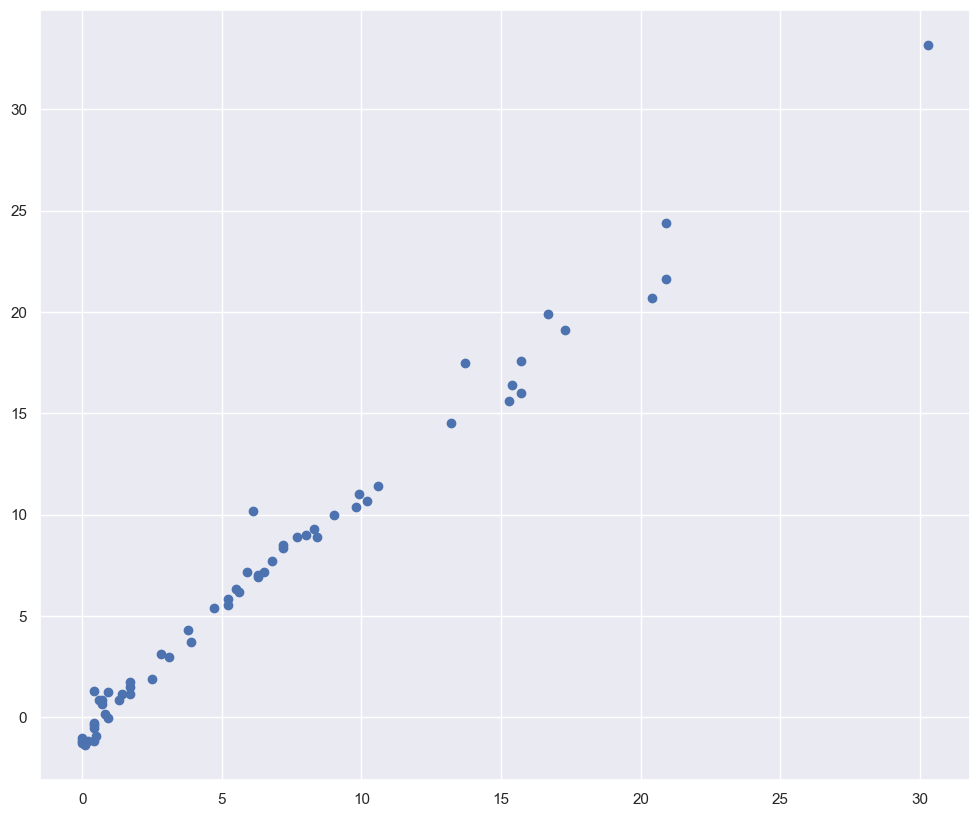

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaler, y_train)
y_pred = lin_reg.predict(X_test_scaler)

mae = mean_absolute_error(y_test, y_pred)

score = r2_score(y_test, y_pred)

print(f"Error absoluto medio {mae:2.3f}")
print(f"R2 score {score:2.3f}")

plt.scatter(y_test, y_pred)


## Lasson Regression

Lasso regression is a regularization technique that applies a penalty to avoid overfitting and improve the accuracy of statistical models.

Error absoluto medio 0.961
R2 score 0.969


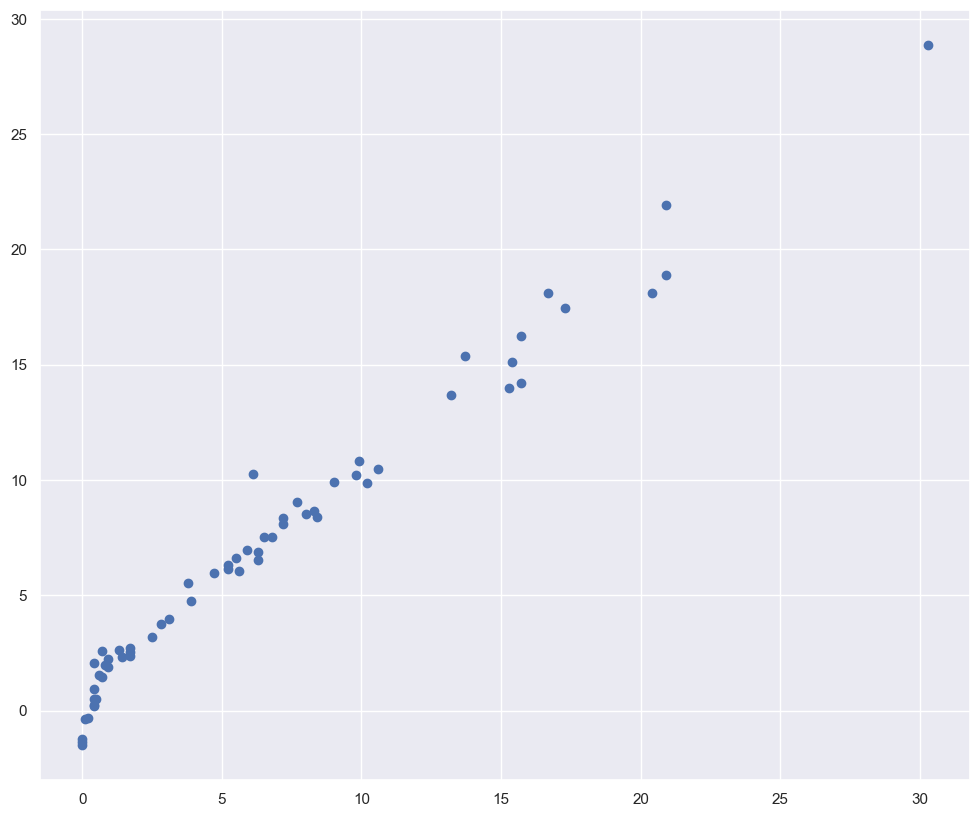

In [23]:
from sklearn.linear_model import Lasso

Lasso_reg = Lasso()
Lasso_reg.fit(X_train_scaler, y_train)
y_pred = Lasso_reg.predict(X_test_scaler)

mae = mean_absolute_error(y_test, y_pred)

score = r2_score(y_test, y_pred)

print(f"Error absoluto medio {mae:2.3f}")
print(f"R2 score {score:2.3f}")

plt.scatter(y_test, y_pred)

## Ridge Regression model

Ridge regression is a statistical regularization technique. It corrects overfitting of training data in machine learning models.

Ridge regression specifically corrects for multicollinearity in regression analysis. This is useful when developing machine learning models with a large number of parameters, especially if those parameters also have high weights.

Error absoluto medio 0.986
R2 score 0.962


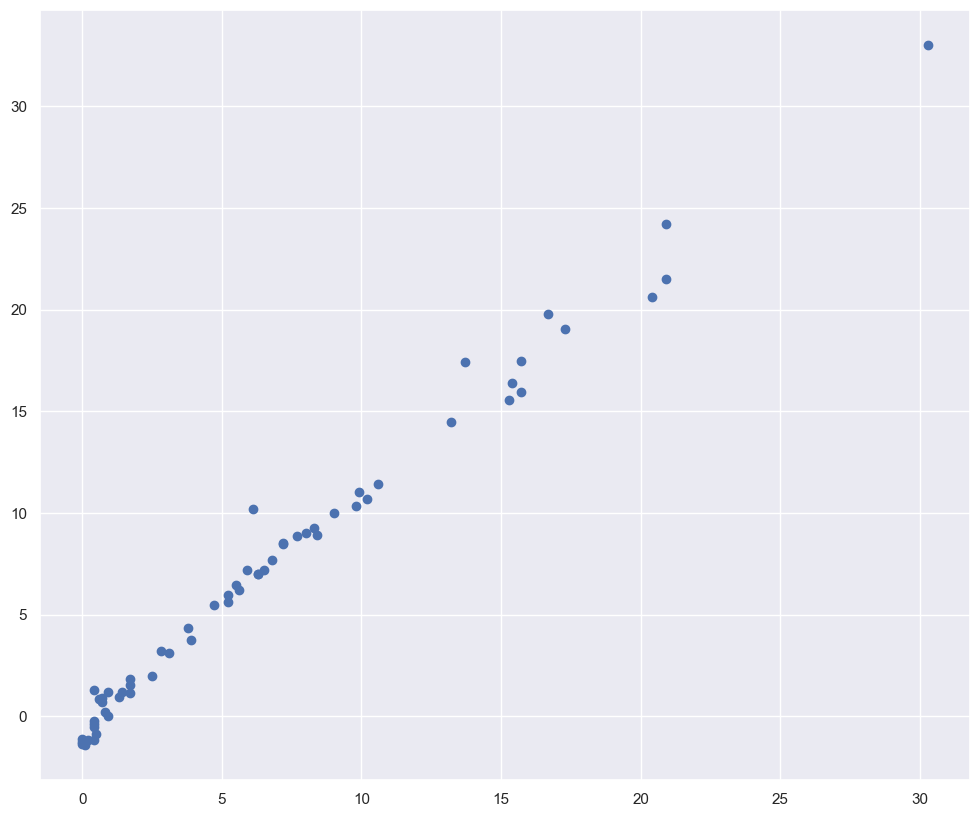

In [24]:
from sklearn.linear_model import Ridge


Ridge_reg = Ridge()
Ridge_reg.fit(X_train_scaler, y_train)
y_pred = Ridge_reg.predict(X_test_scaler)

mae = mean_absolute_error(y_test, y_pred)

score = r2_score(y_test, y_pred)

print(f"Error absoluto medio {mae:2.3f}")
print(f"R2 score {score:2.3f}")

plt.scatter(y_test, y_pred)

## Elasticnet Regression

ElasticNet Regression is a regularized linear regression technique that combines the penalties of Lasso (L1) and Ridge (L2) regression to balance feature selection and multicollinearity handling.

Error absoluto medio 1.651
R2 score 0.908


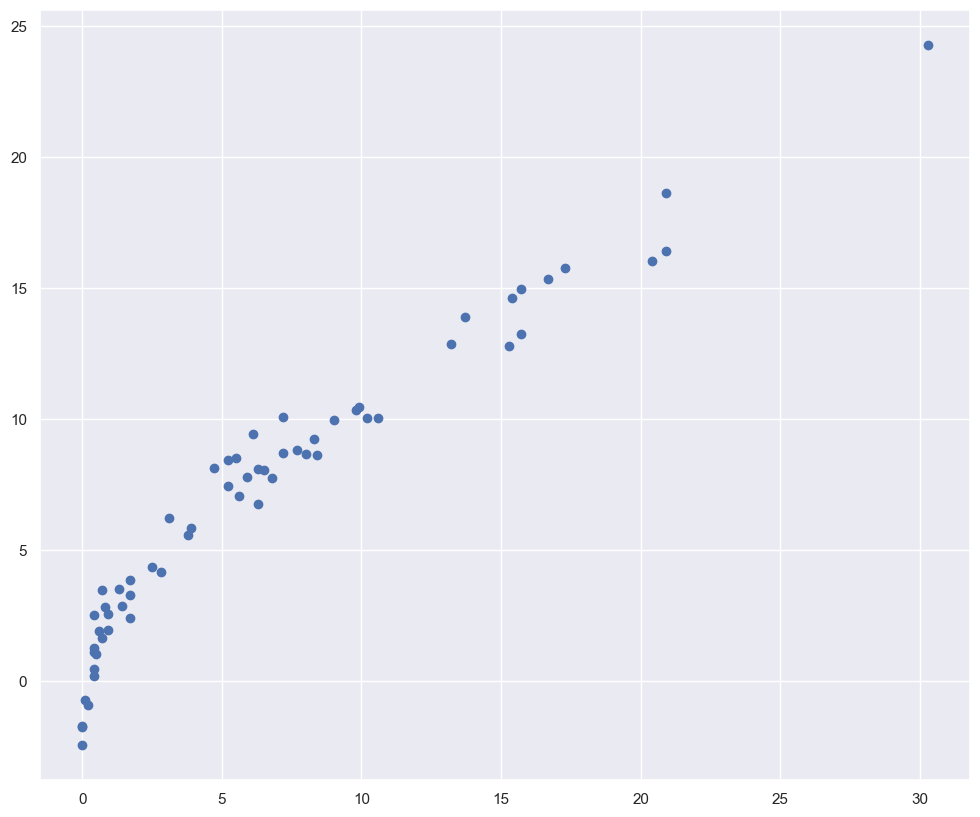

In [25]:
from sklearn.linear_model import ElasticNet


ElasticNet_reg = ElasticNet()
ElasticNet_reg.fit(X_train_scaler, y_train)
y_pred = ElasticNet_reg.predict(X_test_scaler)

mae = mean_absolute_error(y_test, y_pred)

score = r2_score(y_test, y_pred)

print(f"Error absoluto medio {mae:2.3f}")
print(f"R2 score {score:2.3f}")

plt.scatter(y_test, y_pred)

## Coss Validation Lasson

In [26]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv=5)

lassocv.fit(X_train_scaler, y_train)

LassoCV(cv=5)